In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

# Notebook 2.1: EDA I

In [2]:
#pip install --force-reinstall numpy==1.26.4


## Getting Started

In [3]:
GENE_VALS = pd.read_csv('mgphot_gene_values.tsv', 
                 sep='\t',                  # Specify tab as delimiter for TSV files
                 on_bad_lines='skip')

GENE_NAMES = pd.read_csv('mgphot_genes.tsv',
                        sep='\t',
                        on_bad_lines='skip')

HOT100 = pd.read_csv('hot100_charts.tsv',
                        sep='\t',
                        on_bad_lines='skip')

GENE_VALS.head()

,year,mgphot_track_id,artist,title,gene_values
0,1958,1,Andy Williams,The Hawaiian Wedding Song (Ke Kali Nei Au),"[0.4, 1.0, 0.6, 0.9, 0.0, 0.0, 0.5, 1.0, 0.3, ..."
1,1958,2,Dean Martin,Angel Baby,"[0.4, 0.8, 0.5, 0.8, 0.2, 0.4, 0.0, 0.8, 0.5, ..."
2,1958,3,Big Bopper,Big Bopper's Wedding,"[0.3, 0.7, 0.4, 0.3, 0.7, 0.5, 0.0, 1.0, 0.3, ..."
3,1958,4,Big Bopper,Chantilly Lace,"[0.5, 0.6, 0.3, 0.2, 0.6, 0.4, 0.0, 1.0, 0.3, ..."
4,1958,5,Big Bopper,Little Red Riding Hood,"[0.6, 0.7, 0.2, 0.4, 0.4, 0.6, 0.0, 1.0, 0.2, ..."


In [4]:
GENE_VALS.info() #oh yea, no non-null stuff! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21299 entries, 0 to 21298
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             21299 non-null  int64 
 1   mgphot_track_id  21299 non-null  int64 
 2   artist           21299 non-null  object
 3   title            21299 non-null  object
 4   gene_values      21299 non-null  object
dtypes: int64(2), object(3)
memory usage: 832.1+ KB


In [5]:
import ast

GENE_VALS['gene_values'] = GENE_VALS['gene_values'].apply(lambda x: ast.literal_eval("".join(x)))
#using ast to turn this fix the list (before it was like ['[','0','.','4',',',' '])


In [6]:
INSTRUMENTS = GENE_VALS['gene_values'].apply(lambda x: x[19:35]).apply(pd.Series)
INSTRUMENTS.columns = GENE_NAMES['name'].iloc[19:35].tolist()
INSTRUMENTS.index = GENE_VALS['mgphot_track_id'].values
INSTRUMENTS.index.name = 'mgphot_track_id'

#print(INSTRUMENTS.info())       they have the same amount of rows, nothing wrong!
#print(GENE_VALS.info())

INSTRUMENTS['year'] = GENE_VALS['year'].values
INSTRUMENTS.head(100)

,Drum Set,Drum Aggressiveness,Synthetic Drums,Percussion,Electric Guitar,Electric Guitar Distortion,Acoustic Guitar,String Ensemble,Horn Ensemble,Piano,Organ,Rhodes,Synthesizer,Synth Timbre,Bass Guitar,Reed Instrument,year
mgphot_track_id,,,,,,,,,,,,,,,,,
1,0.4,0.2,0.0,0.0,0.0,0.0,0.6,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1958
2,0.6,0.5,0.0,0.0,0.6,0.3,0.0,0.0,0.7,0.6,0.0,0.0,0.0,0.0,0.6,0.5,1958
3,0.5,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.6,0.6,1958
4,0.6,0.4,0.0,0.2,0.6,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.4,0.4,1958
5,0.6,0.6,0.0,0.0,0.5,0.2,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.5,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.6,0.5,0.0,0.4,0.6,0.3,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.6,0.4,1958
97,0.6,0.5,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.6,0.5,1958
98,0.6,0.6,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.4,0.6,0.0,0.0,0.0,0.6,0.8,1958


## Instrumentation Visualization 

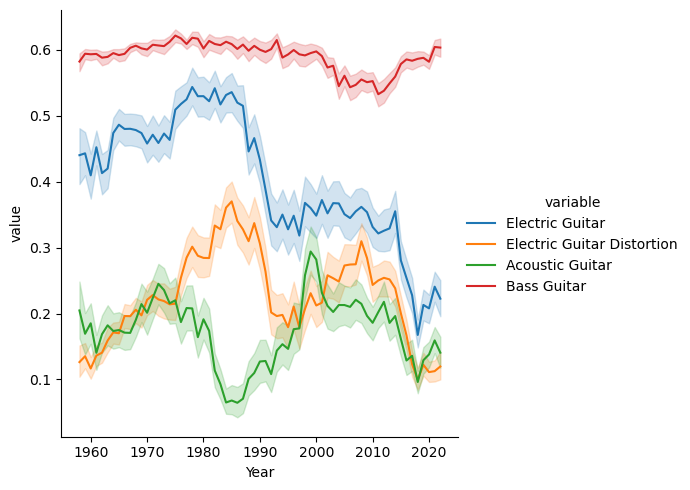

In [7]:
# Source - https://stackoverflow.com/a
# Posted by dnswlt, modified by community. See post 'Timeline' for change history
# Retrieved 2025-11-25, License - CC BY-SA 4.0

data_preproc = pd.DataFrame({
    'Year': INSTRUMENTS['year'], 
    'Electric Guitar': INSTRUMENTS['Electric Guitar'],
    'Electric Guitar Distortion': INSTRUMENTS['Electric Guitar Distortion'],
    'Acoustic Guitar': INSTRUMENTS['Acoustic Guitar'],
    'Bass Guitar': INSTRUMENTS['Bass Guitar'],
})

# Convert the dataframe from wide to long format 
dfl = pd.melt(data_preproc, ['Year'])
sns.relplot(kind='line', data=dfl, x='Year', y='value', hue='variable')
plt.show()

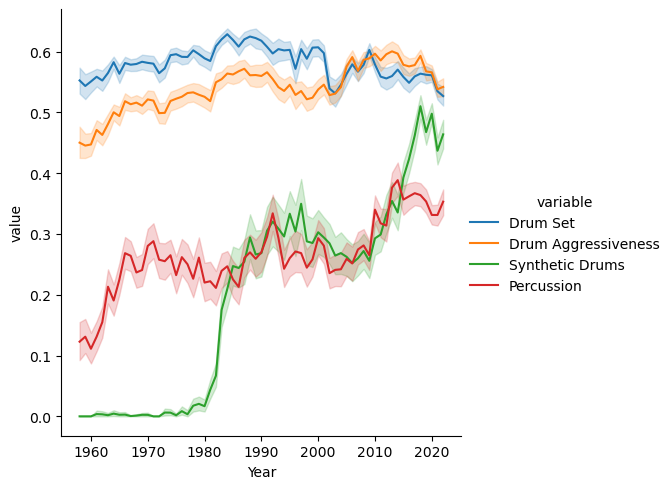

In [8]:
data_preproc2 = pd.DataFrame({
    'Year': INSTRUMENTS['year'], 
    'Drum Set': INSTRUMENTS['Drum Set'],
    'Drum Aggressiveness': INSTRUMENTS['Drum Aggressiveness'],
    'Synthetic Drums': INSTRUMENTS['Synthetic Drums'],
    'Percussion': INSTRUMENTS['Percussion'],
})

# Convert the dataframe from wide to long format 
dfl2 = pd.melt(data_preproc2, ['Year'])
sns.relplot(kind='line', data=dfl2, x='Year', y='value', hue='variable')
plt.show()

In [9]:
data_preproc3 = pd.DataFrame({
    'Year': INSTRUMENTS['year'], 
    'String Ensemble': INSTRUMENTS['String Ensemble'],
     'Horn Ensemble': INSTRUMENTS['Horn Ensemble'],
    'Piano': INSTRUMENTS['Piano'],
    'Organ': INSTRUMENTS['Organ'],
    'Rhodes': INSTRUMENTS['Rhodes'],
    'Synthesizer': INSTRUMENTS['Synthesizer'],
    'Synth Timbre': INSTRUMENTS['Synth Timbre'],
    'Reed Instrument': INSTRUMENTS['Reed Instrument'],
})

# Convert the dataframe from wide to long format 
dfl3 = pd.melt(data_preproc3, ['Year'])

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)


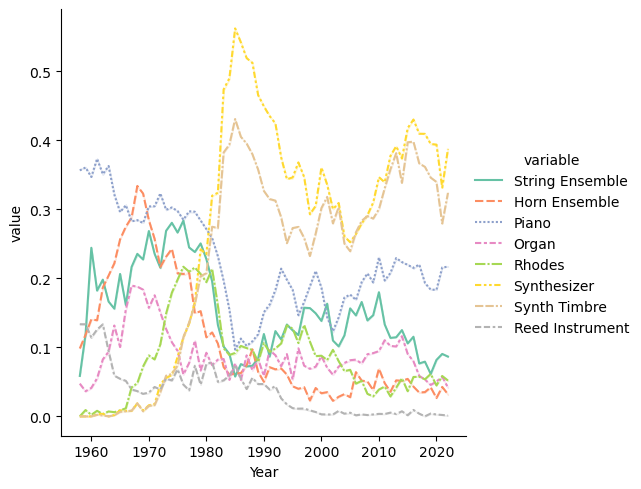

In [10]:
sns.relplot(kind='line', data=dfl3, x='Year', y='value', palette='Set2', hue='variable', style='variable', ci=False)
plt.show()

## Single Song Widget

In [11]:
HOT100['last_week_position'] = HOT100['last_week_position'].astype('Int64') 
#I want to keep that NaN values for now b/c the charts didnt track previous week yet, so it wouldn't be 0
HOT100['chart_week'] = pd.to_datetime(HOT100['chart_week'], format='%Y-%m-%d')

HOT100.info()      #also looking pretty good, makes sense why row 4 & 5 have less values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334500 entries, 0 to 334499
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   chart_week             334500 non-null  datetime64[ns]
 1   current_week_position  334500 non-null  int64         
 2   artist                 334500 non-null  object        
 3   title                  334500 non-null  object        
 4   mgphot_track_id        259765 non-null  float64       
 5   last_week_position     302040 non-null  Int64         
 6   peak_position          334500 non-null  int64         
 7   weeks_on_chart         334500 non-null  int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 20.7+ MB


In [12]:
SONG = HOT100[
    HOT100['title'].str.contains("all i want for christmas", case=False) &
    HOT100['artist'].str.contains('mariah carey', case=False)
    ].copy()  #just wanna make it its own object

SONG.head()  #I was wondering why it didn't chart for the first 6 years of it's existence--it's because it wasn't released as
    #a phyiscal single, so was ineligible for the chart until the week of Januar 8th in 2000.

,chart_week,current_week_position,artist,title,mgphot_track_id,last_week_position,peak_position,weeks_on_chart
216182,2000-01-08,83,Mariah Carey,All I Want For Christmas Is You,NaN,<NA>,83,1
278085,2011-11-19,86,Justin Bieber Duet With Mariah Carey,All I Want For Christmas Is You (SuperFestive!),NaN,<NA>,86,1
283728,2012-12-22,29,Mariah Carey,All I Want For Christmas Is You,NaN,<NA>,29,2
283824,2012-12-29,25,Mariah Carey,All I Want For Christmas Is You,NaN,29,25,3
283920,2013-01-05,21,Mariah Carey,All I Want For Christmas Is You,NaN,25,21,4


In [13]:
HOT100_2 = pd.read_csv('hot100.csv', low_memory = False)

SONG2 = HOT100_2[
    HOT100_2['Song'].str.contains("all i want for christmas", case=False) &
    HOT100_2['Artist'].str.contains('mariah carey', case=False)
    ].copy()  #just wanna make it its own object

SONG2.head()     #even though this goes to 2025 I don't really need the extra three years

#Wanted to check with another dataset that it was true that the song didn't chart from 2000-2011.
#Turns out, Billboard set a rule after 2000 called the "recurrent" rule that pretty much prevented older songs from
#re-entering the chart (if a song spent a certain amount of time on the chart and dropped below 50, it could not return)
#Christmas songs in particular were prevented from entering the charts again to keep the charts fresh every December
#Billboard changed the rules in 2012, getting rid of the "recurrent" rule, which is why there's a 10 year gap

,Date,Song,Artist,Rank,Last Week,Peak Position,Weeks in Charts,Image URL
216169,2000-01-05,All I Want For Christmas Is You,Mariah Carey,83,83,1,-,https://charts-static.billboard.com/img/1994/1...
278072,2011-11-16,All I Want For Christmas Is You (SuperFestive!),Justin Bieber Duet With Mariah Carey,86,86,1,-,https://charts-static.billboard.com/img/2009/0...
283715,2012-12-19,All I Want For Christmas Is You,Mariah Carey,29,29,2,-,https://charts-static.billboard.com/img/1994/1...
283811,2012-12-26,All I Want For Christmas Is You,Mariah Carey,25,29,25,3,https://charts-static.billboard.com/img/1994/1...
283907,2013-01-02,All I Want For Christmas Is You,Mariah Carey,21,25,21,4,https://charts-static.billboard.com/img/1994/1...


In [14]:
#Back to the main data!

#segment = an instance of an x amount of consecutive time a song is on the chart
SONG['diff'] = SONG['chart_week'].diff().dt.days  
SONG['segment'] = (SONG['diff'] != 7).cumsum()
SONG['billboard_year'] = SONG['chart_week'].dt.year
# .cumsum() creates a counter that increases every time the distance between entries is not 7 days, creating segments

SONG.head()

,chart_week,current_week_position,artist,title,mgphot_track_id,last_week_position,peak_position,weeks_on_chart,diff,segment,billboard_year
216182,2000-01-08,83,Mariah Carey,All I Want For Christmas Is You,NaN,<NA>,83,1,NaN,1,2000
278085,2011-11-19,86,Justin Bieber Duet With Mariah Carey,All I Want For Christmas Is You (SuperFestive!),NaN,<NA>,86,1,4333.0,2,2011
283728,2012-12-22,29,Mariah Carey,All I Want For Christmas Is You,NaN,<NA>,29,2,399.0,3,2012
283824,2012-12-29,25,Mariah Carey,All I Want For Christmas Is You,NaN,29,25,3,7.0,3,2012
283920,2013-01-05,21,Mariah Carey,All I Want For Christmas Is You,NaN,25,21,4,7.0,3,2013


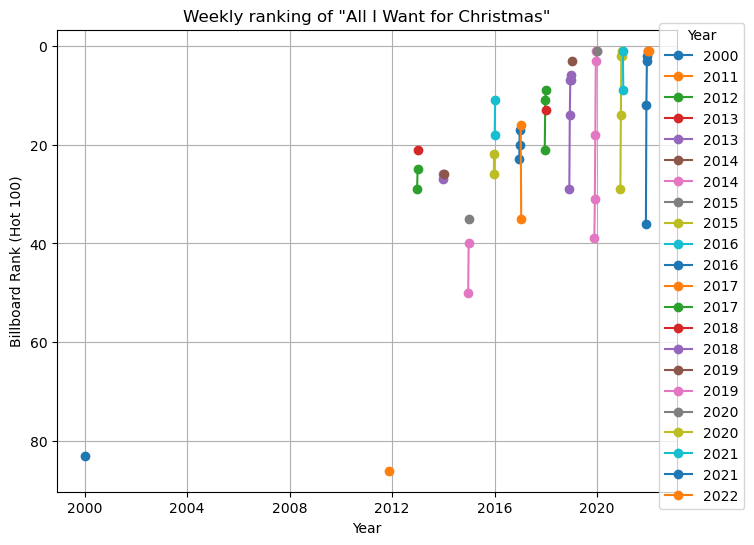

In [26]:
SONG = HOT100[
    HOT100['title'].str.contains("all i want for christmas", case=False) &
    HOT100['artist'].str.contains('mariah carey', case=False)
    ].copy()  #just wanna make it its own object

SONG['diff'] = SONG['chart_week'].diff().dt.days  
SONG['segment'] = (SONG['diff'] != 7).cumsum()
SONG['billboard_year'] = SONG['chart_week'].dt.year

fig, ax = plt.subplots(figsize=(8, 6))

for (year, segment), group in SONG.groupby(['billboard_year', 'segment']):  #gotta isolate the runs of each song
    ax.plot(group['chart_week'],
            group['current_week_position'],
            marker='o',
            label=str(year) if segment == group['segment'].iloc[0] else "")  #prevents duplicate years

ax.invert_yaxis()  #lol had to invert it bc 1 is the best, not the worst!
ax.set_title('Weekly ranking of "All I Want for Christmas"')
ax.set_xlabel('Year')
ax.set_ylabel('Billboard Rank (Hot 100)')
ax.legend(title='Year', bbox_to_anchor = [1.12, 1.03])
ax.grid(True)

plt.savefig("my_plot2.png", dpi=300, transparent=True)  #used this for the final project
    

In [16]:
from IPython.display import display, clear_output

#User text inputs
#Default to all I want for christmas is you b/c its a cool anomaly 
song_input = widgets.Text(value='All I Want for Christmas', description='Song:')  
artist_input = widgets.Text(value='Mariah Carey', description='Artist:')

#Making a run button
run_button = widgets.Button(description='Run Plot', button_style='info') #ooo I like the color of info

output = widgets.Output()

# Function to plot when button is clicked
def on_button_click(b):
    with output:
        clear_output(wait=True)  # Clear previous plot or messages
        
        title = song_input.value.strip()
        artist = artist_input.value.strip()
        
        if not title or not artist:
            print("Please enter both a song title and an artist.")
            return
        
        #back to the original code
        SONG = HOT100[
            HOT100['title'].str.contains(title, case=False, na=False) &
            HOT100['artist'].str.contains(artist, case=False, na=False)
        ]
        
        if SONG.empty:
            print(f'No song found with title "{title}" and artist "{artist}".')
            return
        
        
        SONG['diff'] = SONG['chart_week'].diff().dt.days
        SONG['segment'] = (SONG['diff'] != 7).cumsum()
        SONG['billboard_year'] = SONG['chart_week'].dt.year

        
        fig, ax = plt.subplots(figsize=(12, 6))
        for (year, segment), group in SONG.groupby(['billboard_year', 'segment']):
            ax.plot(group['chart_week'],
                    group['current_week_position'],
                    marker='o',
                    label=str(year) if segment == group['segment'].iloc[0] else "")
        
        ax.invert_yaxis()
        ax.set_title(f'Weekly ranking of "{SONG["title"].iloc[0]}" by {SONG["artist"].iloc[0]}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Billboard Rank (Hot 100)')
        ax.legend(title='Year', bbox_to_anchor=[1.12, 1.03])
        ax.grid(True)
        plt.show()

#Connecting the button to the click
run_button.on_click(on_button_click)

display(widgets.VBox([song_input, artist_input, run_button, output]))


## Genre Visualization

In [17]:
TOP_5 = pd.read_csv('bimmuda_genre.csv')
TOP_5.head()

,Title,Artist,Year,Position,Genre (Broad 1),Genre (Broad 2),Genre (Specific 1),Genre (Specific 2),Genre (Specific 3),Link to Audio,...,Tonic 6,Mode 1,Mode 2,Mode 3,Mode 4,Mode 5,Mode 6,BPM 1,BPM 2,BPM 3
0,Goodnight Irene,Gordon Jenkins & The Weavers,1950,1,Folk,NaN,NaN,NaN,NaN,https://open.spotify.com/track/3GtfeLBXe15nyEM...,...,NaN,Major,NaN,NaN,NaN,NaN,NaN,94,141.0,NaN
1,Mona Lisa,Nat King Cole,1950,2,Pop,NaN,Traditional pop,NaN,NaN,https://open.spotify.com/track/5dae01pKNjRQtgO...,...,NaN,Major,NaN,NaN,NaN,NaN,NaN,65,NaN,NaN
2,Third Man Theme,Anton Karas,1950,3,Folk,NaN,NaN,NaN,NaN,https://open.spotify.com/track/7rRGujA12UJcRUz...,...,NaN,Major,NaN,NaN,NaN,NaN,NaN,176,152.0,NaN
3,Sam's Song,Gary & Bing Crosby,1950,4,Pop,NaN,Traditional pop,NaN,NaN,https://open.spotify.com/track/1Wnlagmoyo7M7In...,...,NaN,Major,NaN,NaN,NaN,NaN,NaN,118,NaN,NaN
4,Simple Melody,Gary & Bing Crosby,1950,5,Pop,NaN,Traditional pop,NaN,NaN,https://open.spotify.com/track/75lpxrV9sLZIRvz...,...,NaN,Major,NaN,NaN,NaN,NaN,NaN,151,NaN,NaN


In [18]:
TOP_5['Genre (Specific 3)'].unique()

array([nan, 'Pop rock', 'Contemporary country', 'Eurohouse',
       'Alternative rock', 'Hard rock', 'Pop rap', 'Soft rock',
       'Dance-pop', 'Funk-pop', 'Synth-pop', 'Indie pop', 'Disco-pop',
       'Moombahton', 'UK funky', 'Rap rock', 'Pop-funk', 'Emo',
       'Nu-disco'], dtype=object)

In [19]:
TOP_5['Genre (Specific 2)'].unique()

array([nan, 'Easy listening', 'Traditional pop', 'Pyschedelic pop',
       'Pop rock', 'Blues rock', 'Soft rock', 'Synth-rock', 'Dance-pop',
       'Neo-pyschedelia', 'Synth-funk', 'Hard rock', 'G-funk',
       'Country dawn', 'Electropop', 'Teen-pop', 'Contemporary country',
       'Post-grunge', 'Alternative rock', 'Pop-rock', 'Gangster rap',
       'Pop soul', 'Power pop', 'Electro', 'Neo mellow', 'Reggaeton',
       'Pop-rap', 'Synth-pop', 'Disco-pop', 'Pop rap', 'Indie',
       'Bubblegum pop', 'Indie rock', 'Comedy hip-hop', 'Boogie',
       'Funk-pop', 'Tropical house', 'Afrobeats', 'Reggae-pop',
       'Latin pop', 'Trap', 'Country trap', 'Synthwave', 'Downtempo',
       'Nu-disco', 'Rap rock', 'Pop punk', 'New wave'], dtype=object)

In [20]:
TOP_5['Genre (Specific 1)'].unique()           #there's a lot of genres here...

array([nan, 'Traditional pop', 'Easy listening', 'Doo-wop', 'Rockabilly',
       'Big band', 'Chanson', 'Jangle pop', 'Nashville Sound',
       'Surf music', 'Pop rock', 'Garage rock', 'Folk rock',
       'Sunshine pop', 'Gothic country', 'Bubblegum pop',
       'Pyschedelic soul', 'Hard rock', 'Soft rock', 'Psychedelic soul',
       'Blue-eyed soul', 'Philly soul', 'Soft rock ', 'Tejano', 'Disco',
       'Funk rock ', 'Southern soul', 'Disco ', 'Disco-rock', 'New wave',
       'Pop rock ', 'Post-disco', 'Pub rock', 'Dance-rock', 'Avant-pop',
       'Funk-pop', 'Quiet storm', 'Synth-funk', 'Arena rock', 'Dance-pop',
       'Funk rock', 'Glam metal', 'New jack swing', 'House', 'Hip house',
       'Miami bass', 'Reggae fusion', 'Europop', 'Gangsta rap',
       'New wave pop', 'Flamenco', 'Mellow gold', 'Hip-hop soul',
       'Country pop', 'Hip pop', 'Latin rock', 'Neo-soul', 'Pop-rock',
       'Post-grunge', 'Pop rap', 'East Coast hip-hop', 'Dancehall',
       'Crunk&B', 'Electropop', '

In [21]:
GENRE = TOP_5[['Title','Artist','Year','Position']].copy()
GENRE['Genre'] = TOP_5['Genre (Broad 2)']  #start with most specific
#GENRE['Genre'] = GENRE['Genre'].fillna(TOP_5['Genre (Broad 2)']) #then prioritize genre broad 2
GENRE['Genre'] = GENRE['Genre'].fillna(TOP_5['Genre (Broad 1)']) #end with genre broad 1

GENRE['Genre'].unique()  #I think this narrows down the genres well, but there are some from specific 2 & 3 I like more
                         #but is that up to me? Genre is tricky...

array(['Folk', 'Pop', 'Jazz', 'Latin', 'Rock', 'R&B', 'Country',
       'Funk/Soul', 'Rock ', 'EDM/Dance', 'Hip-hop', 'Reggae', 'Rap'],
      dtype=object)

In [22]:
GENRE['Genre'].value_counts()  #a lot of 1's... let's see how it graphs!

Genre
Pop          149
Rock          72
R&B           50
Hip-hop       32
Funk/Soul     31
Country       12
EDM/Dance      9
Folk           8
Jazz           8
Rock           4
Reggae         3
Latin          2
Rap            1
Name: count, dtype: int64

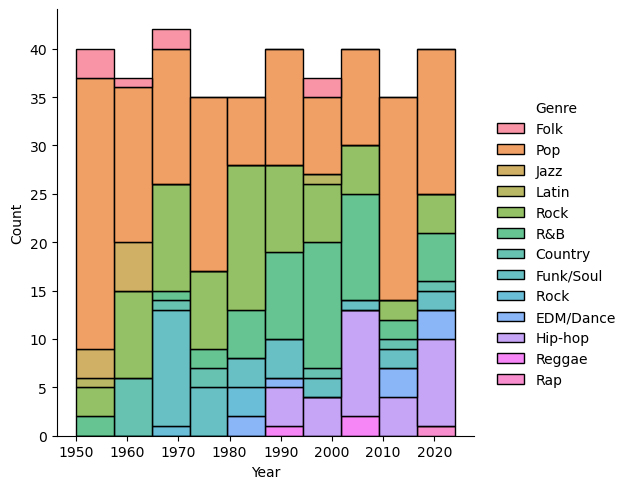

In [23]:
sns.displot(data=GENRE, x="Year", hue="Genre", multiple="stack")

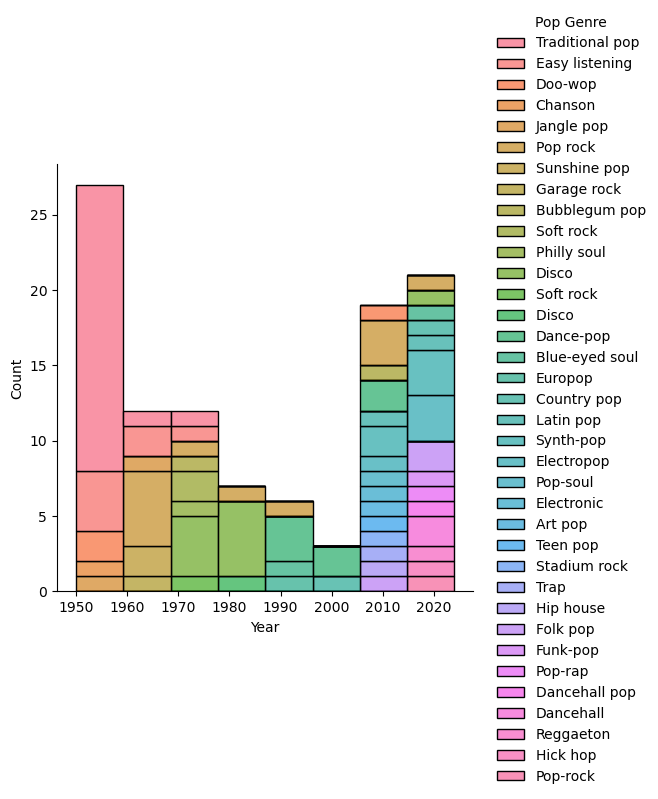

In [24]:
#Maybe let's make another with specifically pop and rock
POP= GENRE[
    GENRE['Genre'].str.contains('Pop', case=False, na=False)
].copy()

POP['Pop Genre'] = TOP_5['Genre (Specific 1)']  #start with most specific, again
POP['Pop Genre'].value_counts()

sns.displot(data=POP, x="Year", hue="Pop Genre", multiple="stack")

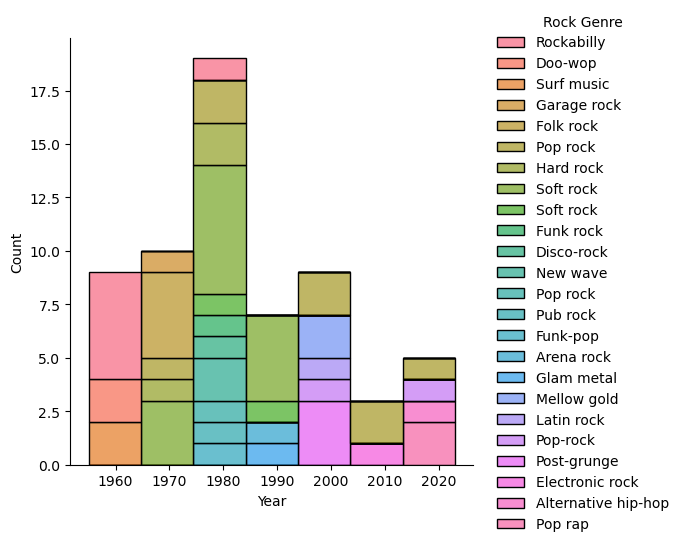

In [25]:
ROCK = GENRE[
    GENRE['Genre'].str.contains('Rock', case=False, na=False)
].copy()

ROCK['Rock Genre'] = TOP_5['Genre (Specific 1)']  #start with most specific, again
ROCK['Rock Genre'].value_counts()

sns.displot(data=ROCK, x="Year", hue="Rock Genre", multiple="stack")

I don't think these hyper specific graphs for rock and pop are gonna work. Too many genres! I'll stick with the generic ones and just add a footnote.